In [1]:
import numpy as np
import matplotlib.pyplot as plt
import random
from scipy.stats import norm
np.random.seed(123)
random.seed(123)

In [2]:
N = 1000 #population size
x = np.random.uniform(1, 10, size = N) #auxiliary information
eps = np.random.normal(0, 1, size = N) #
y = 2 * x + 3 + eps 
mu = np.mean(y)
cum_size = [k+1 for k in range(1000)]

bias of srs with n=50 is 0.0285
bias of random ordering systematic sampling with n=50 is 0.0003
bias of linear ordering systematic sampling with n=50 is 0.0047
bias of poisson sampling with n=50 is 0.0348
average estimated var_est_hat of simple random sampling with n=50 is 0.5112
ture var_est_hat of simple random sampling with n=50 is 0.5116
ture var_est_hat of linear ordering systematic sampling with n=50 is 0.0330
average estimated var_est_hat of poisson sampling with n=50 is 9.4104
true var_est_hat of poisson sampling with n=50 is 3.7718


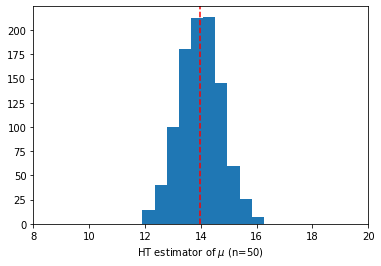

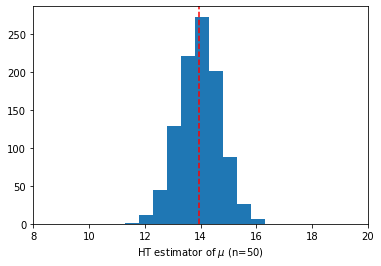

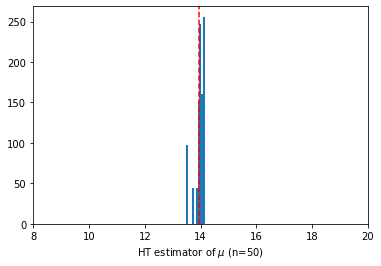

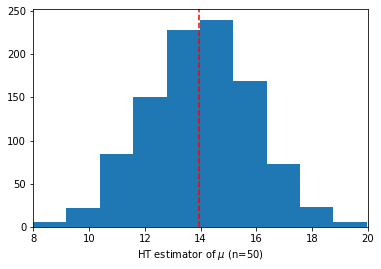

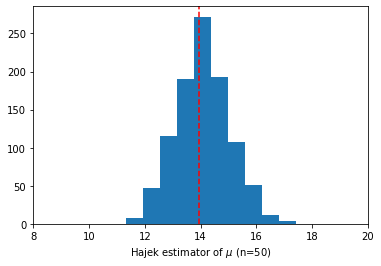

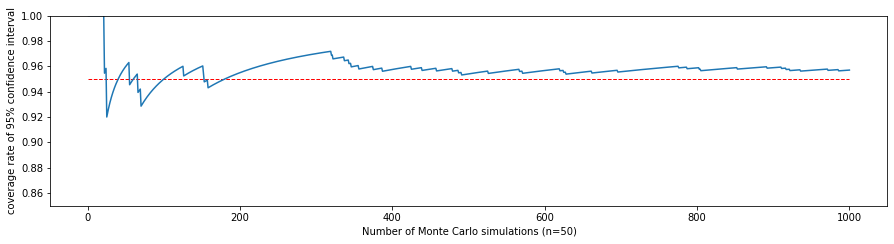

bias of srs with n=100 is 0.0044
bias of random ordering systematic sampling with n=100 is 0.0244
bias of linear ordering systematic sampling with n=100 is 0.0064
bias of poisson sampling with n=100 is 0.0046
average estimated var_est_hat of simple random sampling with n=100 is 0.2425
ture var_est_hat of simple random sampling with n=100 is 0.2423
ture var_est_hat of linear ordering systematic sampling with n=100 is 0.0092
average estimated var_est_hat of poisson sampling with n=100 is 8.9739
true var_est_hat of poisson sampling with n=100 is 1.7751


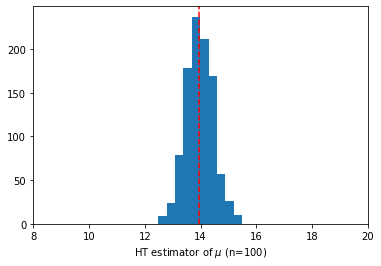

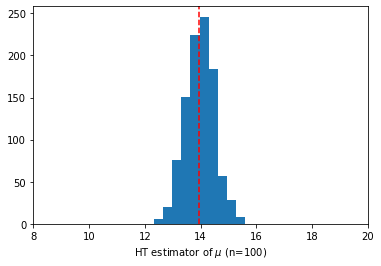

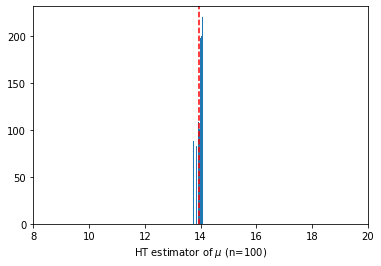

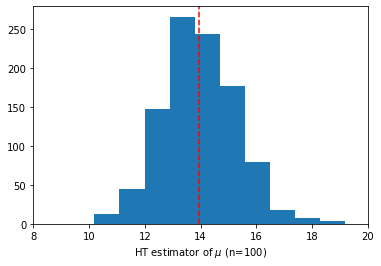

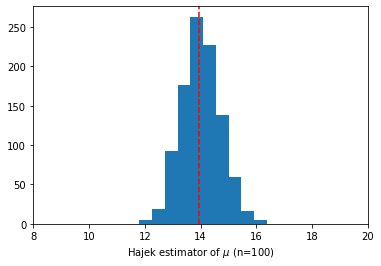

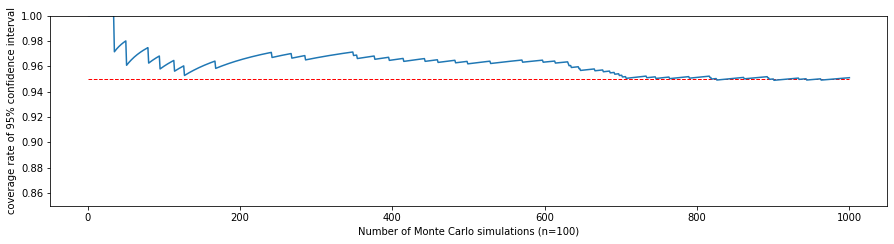

In [3]:
#simple random sampling without replacement
def srs(n):
    srs_sample_index = np.random.choice(N, n, replace = False)
    srs_sample = y[srs_sample_index]
    srs_HT = np.mean(srs_sample)
    var_srs_HT = 1/n * (1-n/N) * np.var(srs_sample, ddof=1) #estimated variance of HT estimator
    return ([srs_HT, var_srs_HT])

#systematic sampling with random ordering
def sys_random_order(n):
    a = int(N / n)
    r = np.random.choice(range(a))
    sys_sample_index = np.arange(r, N, step = a)
    y1 = np.random.permutation(y) #shuffle y, return y1, without change y
    sys_sample = y1[sys_sample_index]
    sys_HT = (1/N) * sum(sys_sample) / (1/a) #actually sample mean
    return sys_HT

#systematic sampling with linear ordering
sorted_id = sorted(range(len(x)), key=lambda k: x[k], reverse=False) #the index list of sorted x
def sys_linear_order(n):
    a = int(N / n)
    r = np.random.choice(range(a))
    sys_sample_index = np.arange(r, N, step = a)
    sys_sample = y[sorted_id][sys_sample_index]
    sys_HT = (1/N) * sum(sys_sample) / (1/a)
    return (sys_HT)    

#poisson sampling with pi_i proportional to x_i
total_x = sum(x)
def poi_pps(n):
    result_poi_pps = np.zeros([N, 5])
    true_var_poi_HT = 0
    for i in range(N):
        result_poi_pps[i, 0] = n * x[i] / total_x #define pi_i
        result_poi_pps[i, 1] = np.random.binomial(1, result_poi_pps[i, 0], 1) #chosen or not
        result_poi_pps[i, 2] = y[i]
        result_poi_pps[i, 3] = result_poi_pps[i, 1] * result_poi_pps[i, 2] / result_poi_pps[i, 0] #inside Y_HT_hat
        result_poi_pps[i, 4] = result_poi_pps[i, 1] / result_poi_pps[i, 0] * \
                                (1/result_poi_pps[i, 0] - 1) * result_poi_pps[i, 2] * result_poi_pps[i, 2] #inside  estimated var_est_hat
        true_var_poi_HT += ((1/result_poi_pps[i, 0]) - 1) * result_poi_pps[i, 2] * result_poi_pps[i, 2] / (N*N)
    Y_HT_hat = sum(result_poi_pps[:, 3]) #Y_HT hat
    Y_Hajek = N * Y_HT_hat / sum(result_poi_pps[:, 1] / result_poi_pps[:, 0]) #Y_Hajek
    var_est_hat = sum(result_poi_pps[:, 4])/(N*N)
    return ([Y_HT_hat / N, Y_Hajek / N, var_est_hat, true_var_poi_HT])

for n in {50, 100}:
    ESTs = np.zeros([1000, 8])
    for i in range(1000):
        ESTs[i, 0] = srs(n)[0] #Y_HT hat/N of simple random sampling
        ESTs[i, 1] = sys_random_order(n) #Y_HT hat/N of systematic sampling with random order
        ESTs[i, 2] = sys_linear_order(n) #Y_HT hat/N of systematic sampling with linear order
        ESTs[i, 3] = poi_pps(n)[0] #Y_HT hat/N
        ESTs[i, 4] = poi_pps(n)[1] #Y_Hajek/N
        ESTs[i, 5] = poi_pps(n)[2] #estimated var_est_hat of poisson sampling
        ESTs[i, 6] = srs(n)[1] #estimated var_est_hat of simple random sampling
    
    #monte carlo bias
    bias_srs_HT = np.mean(ESTs[:,0]) - mu
    bias_sys_random_HT = np.mean(ESTs[:,1]) - mu
    bias_sys_linear_HT = np.mean(ESTs[:,2]) - mu
    bias_poi_HT = np.mean(ESTs[:,3]) - mu
    
    print("bias of srs with n=" + str(n) + " is", format(bias_srs_HT, '.4f'))
    print("bias of random ordering systematic sampling with n=" + str(n) + " is", format(bias_sys_random_HT, '.4f'))
    print("bias of linear ordering systematic sampling with n=" + str(n) + " is", format(bias_sys_linear_HT, '.4f'))
    print("bias of poisson sampling with n=" + str(n) + " is", format(bias_poi_HT, '.4f'))    
    
    #vars
    ave_var_srs_HT = np.mean(ESTs[:, 6]) #average estimated var_est_hat of simple random sampling
    true_var_srs_HT = 1/n * (1-n/N) * np.var(y, ddof=1) #ture var_est_hat of simple random sampling
    a = int(N / n)
    #ture var_est_hat of linear ordering systematic sampling
    true_var_sys_linear_HT = 1/(N*N) *a * (a-1) * n*n * np.var(np.unique(ESTs[:, 2]), ddof=1)  
    ave_var_poi_HT = np.mean(ESTs[: 5]) #average estimated var_est_hat of poisson sampling
    true_var_poi_HT = poi_pps(n)[3] #true var_est_hat of poisson sampling
    
    print("average estimated var_est_hat of simple random sampling with n=" + str(n) + " is", format(ave_var_srs_HT, '.4f'))
    print("ture var_est_hat of simple random sampling with n=" + str(n) + " is", format(true_var_srs_HT, '.4f'))
    print("ture var_est_hat of linear ordering systematic sampling with n=" + str(n) + " is", format(true_var_sys_linear_HT, '.4f'))
    print("average estimated var_est_hat of poisson sampling with n=" +str(n) + " is", format(ave_var_poi_HT, '.4f'))
    print("true var_est_hat of poisson sampling with n=" +str(n) + " is", format(true_var_poi_HT, '.4f'))
    
    plt.plot()
    plt.hist(ESTs[:,0])
    plt.xlim(8, 20)
    plt.xlabel(r'HT estimator of $\mu$ (n=' + str(n) + ')')
    plt.axvline(x = mu, linestyle = '--', color = 'r')
    plt.savefig('srs_HT_'+str(n)+'.png')
    plt.show()
    plt.close()
    
    plt.plot()
    plt.hist(ESTs[:,1])
    plt.xlim(8, 20)
    plt.xlabel(r'HT estimator of $\mu$ (n=' + str(n) + ')')
    plt.axvline(x = mu, linestyle = '--', color = 'r')
    plt.savefig('sys_HT_'+str(n)+'.png')
    plt.show()
    plt.close()

    plt.plot()
    plt.hist(ESTs[:,2])
    plt.xlim(8, 20)
    plt.xlabel(r'HT estimator of $\mu$ (n=' + str(n) + ')')
    plt.axvline(x = mu, linestyle = '--', color = 'r')
    plt.savefig('sys_order_HT_'+str(n)+'.png')
    plt.show()
    plt.close()
    
    plt.plot()
    plt.hist(ESTs[:,3])
    plt.xlim(8, 20)
    plt.xlabel(r'HT estimator of $\mu$ (n=' + str(n) + ')')
    plt.axvline(x = mu, linestyle = '--', color = 'r')
    plt.savefig('poi_pps_HT_'+str(n)+'.png')
    plt.show()
    plt.close()
    
    plt.plot()
    plt.hist(ESTs[:,4])
    plt.xlim(8, 20)
    plt.xlabel(r'Hajek estimator of $\mu$ (n=' + str(n) + ')')
    plt.axvline(x = mu, linestyle = '--', color = 'r')
    plt.savefig('poi_pps_Hajek_'+str(n)+'.png')
    plt.show()
    plt.close()  
    
    q_upper = norm.ppf(0.975)
    q_lower = norm.ppf(0.025) 

    test_result = np.zeros(1000)
    for i in range(N):
        test_result[i] = (ESTs[i,3] + q_lower * np.sqrt(ESTs[i,5]) < mu) and (ESTs[i,3] + q_upper * np.sqrt(ESTs[i,5]) > mu)
    cum_coverage_rate = np.cumsum(test_result) / cum_size
    fig = plt.figure(figsize = (15, 3.5))
    plt.plot(cum_size, cum_coverage_rate)
    plt.hlines(0.95, 1, 1000, color = 'r', linestyle = 'dashed', linewidth = 1)
    plt.xlabel('Number of Monte Carlo simulations (n=' + str(n) + ')')
    plt.ylabel('coverage rate of 95% confidence interval')
    plt.ylim(0.85, 1)
    plt.savefig('Coverage_rate_'+str(n)+'.png')
    plt.show()
    plt.close()